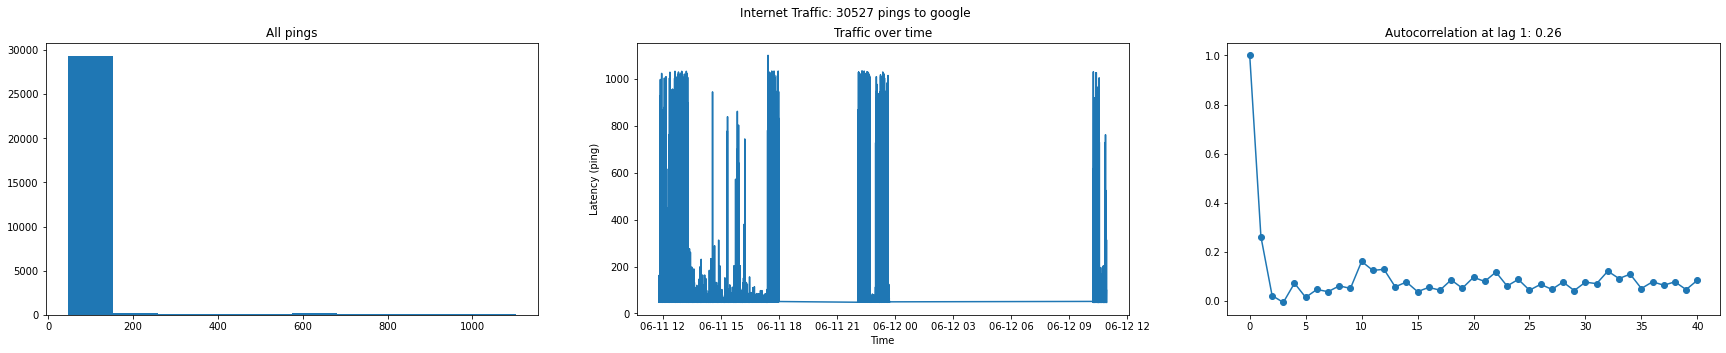

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from statsmodels.tsa import stattools
from IPython.display import HTML
import datetime

pd.set_option('max_colwidth', 1000)

%run ./ping_helps.ipynb

clean = read_cleaned(1000000)
autocor = stattools.acf(clean['lat'], fft=False)

clean.set_index('tstamp', inplace=True)

# Doing it this way bc I literally always forget
WIDTH = 30
HEIGHT = 5
fig, axs = plt.subplots(figsize=(WIDTH,HEIGHT), nrows=1,ncols=3)
fig.suptitle('Internet Traffic: {} pings to google'.format(clean.shape[0]))

axs[0].hist(clean['lat']);
axs[0].set_title('All pings');

axs[1].plot(clean['lat']);
axs[1].set_xlabel('Time');
axs[1].set_ylabel('Latency (ping)');
axs[1].set_title('Traffic over time')

axs[2].plot(autocor, marker='o')
axs[2].set_title('Autocorrelation at lag 1: {:.2f}'.format(autocor[1]));

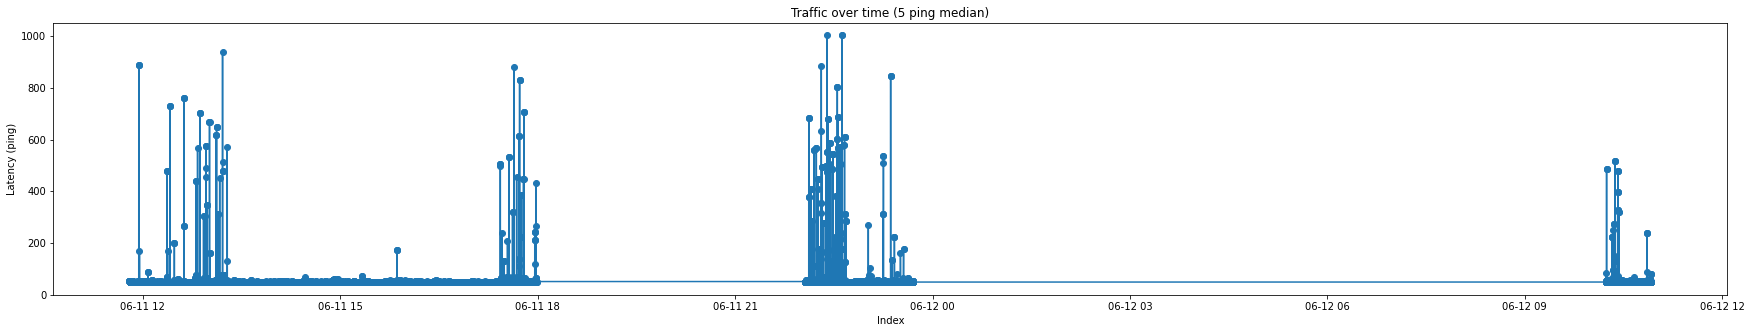

In [2]:
WIDTH = 30
HEIGHT = 5
fig, axs = plt.subplots(figsize=(WIDTH,HEIGHT), nrows=1, ncols=1)

WINDOW = 5
axs.plot(clean['lat'].rolling(WINDOW).median(), marker='o');
axs.set_xlabel('Index');
axs.set_ylabel('Latency (ping)');
axs.set_title('Traffic over time ({} ping median)'.format(WINDOW));

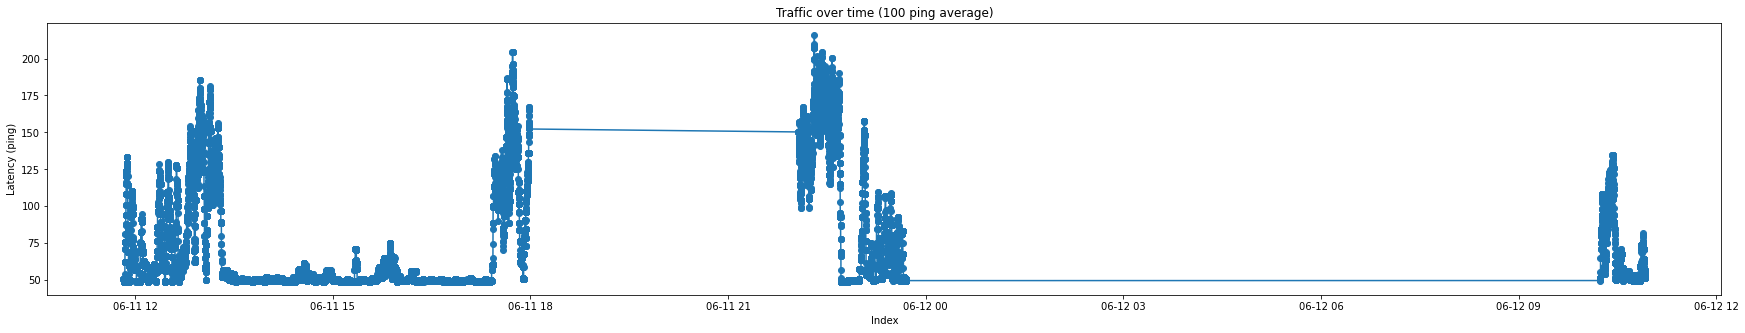

In [3]:
WIDTH = 30
HEIGHT = 5
fig, axs = plt.subplots(figsize=(WIDTH,HEIGHT), nrows=1, ncols=1)

WINDOW = 100
axs.plot(clean['lat'].rolling(WINDOW).mean(), marker='o');
axs.set_xlabel('Index');
axs.set_ylabel('Latency (ping)');
axs.set_title('Traffic over time ({} ping average)'.format(WINDOW));

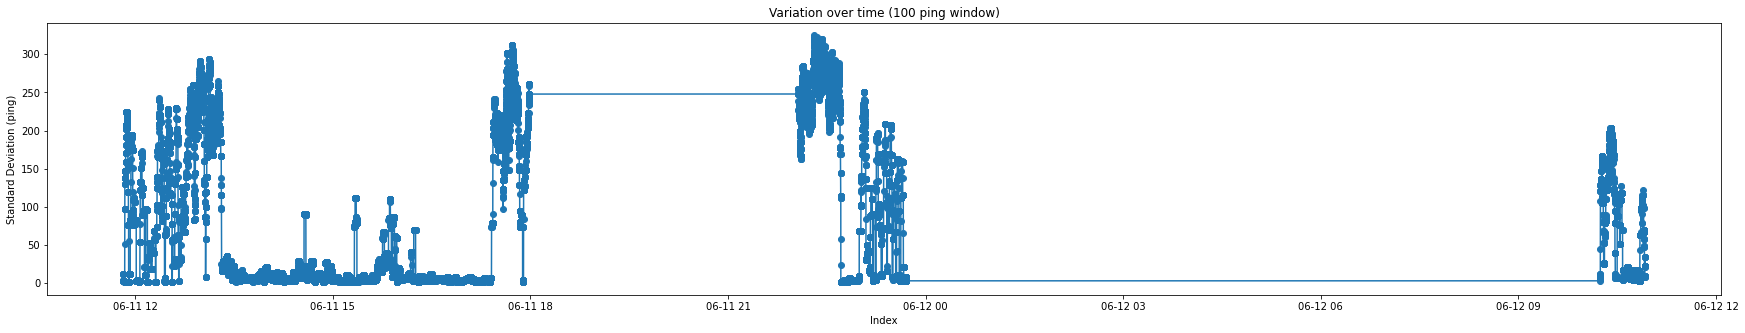

In [4]:
WIDTH = 30
HEIGHT = 5
fig, axs = plt.subplots(figsize=(WIDTH,HEIGHT), nrows=1, ncols=1)

WINDOW = 100
axs.plot(clean['lat'].rolling(WINDOW).std(), marker='o');
axs.set_xlabel('Index');
axs.set_ylabel('Standard Deviation (ping)');
axs.set_title('Variation over time ({} ping window)'.format(WINDOW));